# Baseline 

## Libraries + Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Data 

### Paths

In [2]:
train_data_path = "./Datasets/model_data/train_data.csv"
test_data_path = "./Datasets/model_data/test_data.csv"

### Train Data Summary

In [3]:
train_df = pd.read_csv(train_data_path)
train_df.head()

,text,decade,decade_label,book_title,book_id,paragraph_id,word_count
0,Produced by Gary R. Young THE SCHOOL FOR SCAND...,1770,0,The School for Scandal,1770_The_School_for_Scand,1770_1770_The_School_for_Scand_000,210
1,"the works of Sheridan as he wrote them, I may ...",1770,0,The School for Scandal,1770_The_School_for_Scand,1770_1770_The_School_for_Scand_001,210
2,he had been nineteen years endeavouring to sat...,1770,0,The School for Scandal,1770_The_School_for_Scand,1770_1770_The_School_for_Scand_002,210
3,"That even you assist her fame to raise, Approv...",1770,0,The School for Scandal,1770_The_School_for_Scand,1770_1770_The_School_for_Scand_003,210
4,and face-- Poets would study the immortal line...,1770,0,The School for Scandal,1770_The_School_for_Scand,1770_1770_The_School_for_Scand_004,210


### Test Data Summary

In [6]:
test_df = pd.read_csv(test_data_path)
test_df.head()

,text,decade,decade_label,book_title,book_id,paragraph_id,word_count
0,An Inquiry into the Nature and Causes of the W...,1770,0,An Inquiry into the Nature and Causes of the W...,1770_An_Inquiry_into_the_,1770_1770_An_Inquiry_into_the__000,210
1,THE EXPENSE OF MAINTAINING THE NATIONAL CAPITA...,1770,0,An Inquiry into the Nature and Causes of the W...,1770_An_Inquiry_into_the_,1770_1770_An_Inquiry_into_the__001,210
2,"PRODUCE OF LAND, AS EITHER THE SOLE OR THE PRI...",1770,0,An Inquiry into the Nature and Causes of the W...,1770_An_Inquiry_into_the_,1770_1770_An_Inquiry_into_the__002,210
3,"Whatever be the soil, climate, or extent of te...",1770,0,An Inquiry into the Nature and Causes of the W...,1770_An_Inquiry_into_the_,1770_1770_An_Inquiry_into_the__003,210
4,of those who work; yet the produce of the whol...,1770,0,An Inquiry into the Nature and Causes of the W...,1770_An_Inquiry_into_the_,1770_1770_An_Inquiry_into_the__004,210


## Multinomial Naieve Bayes 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# feature extraction using continuous bag of words 
vectorizer = TfidfVectorizer(
    max_features=20000,
    min_df=10,
    stop_words='english'
)

X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['decade_label']
y_test = test_df['decade_label']

print(f"Feature matrix shape: {X_train.shape}")

Feature matrix shape: (84860, 20000)


In [21]:
# train model 
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [22]:
# predict
y_pred = nb.predict(X_test)

In [24]:
# evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [25]:
print(f"Model: Multinomial NB")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1:        {f1:.4f}")

Model: Multinomial NB
Accuracy:  0.2891
Precision: 0.2553
Recall:    0.2505
F1:        0.2317


In [27]:
def plot_confusion_matrix(cm, train_df, test_df):
    """Plot confusion matrix like the paper's tables"""
    # Get decade labels
    decades = sorted(train_df["decade"].unique())
    decade_labels = [f"{d}s" for d in decades]

    # Normalize by true class (like Table 6 in paper)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm_norm,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        xticklabels=decade_labels,
        yticklabels=decade_labels,
    )
    plt.title("Multinomial NB Confusion Matrix\n(Normalized by True Class)")
    plt.xlabel("Predicted Decade")
    plt.ylabel("Actual Decade")
    plt.tight_layout()
    plt.show()

    # Print confusion matrix like paper's Table 4
    print(f"\n=== CONFUSION MATRIX ===")
    print("Predicted ->", end="")
    for decade in decades:
        print(f" {decade}s", end="")
    print()

    for i, true_decade in enumerate(decades):
        print(f"Actual {true_decade}s", end="")
        for j in range(len(decades)):
            print(f" {cm[i,j]:4d}", end="")
        print()

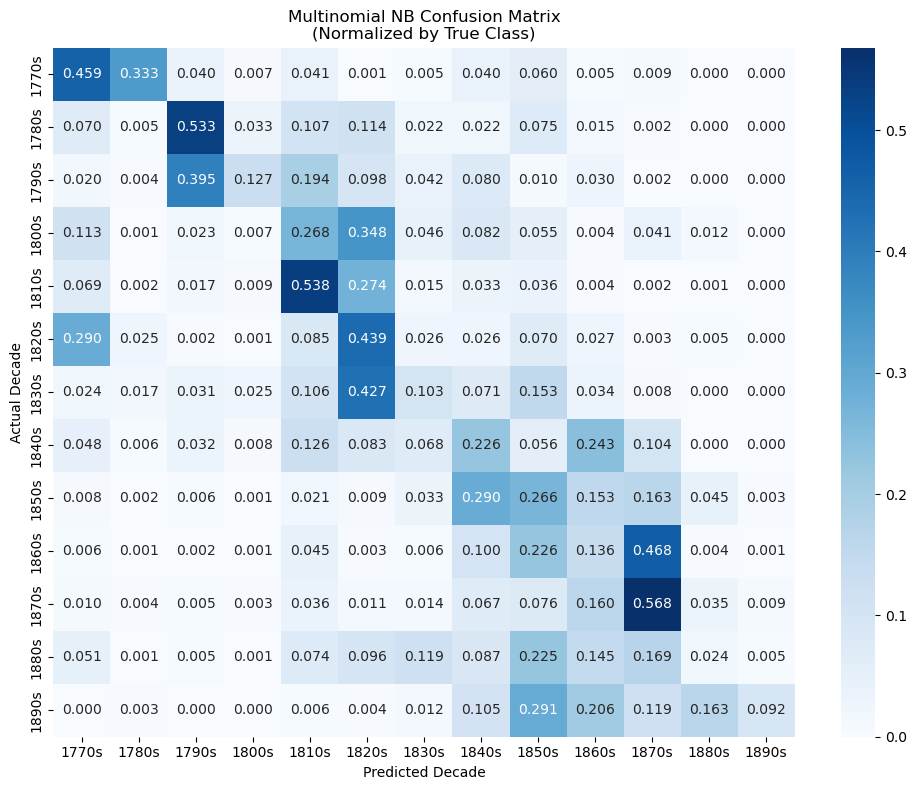


=== CONFUSION MATRIX ===
Predicted -> 1770s 1780s 1790s 1800s 1810s 1820s 1830s 1840s 1850s 1860s 1870s 1880s 1890s
Actual 1770s  963  699   83   14   87    3   11   84  127   10   19    0    0
Actual 1780s   57    4  432   27   87   92   18   18   61   12    2    0    0
Actual 1790s   22    4  445  143  219  111   47   90   11   34    2    0    0
Actual 1800s  104    1   21    6  247  321   42   76   51    4   38   11    0
Actual 1810s  102    3   25   13  790  402   22   48   53    6    3    2    0
Actual 1820s  714   61    6    3  209 1082   64   64  172   67    8   12    0
Actual 1830s   45   32   59   48  199  805  194  134  288   64   16    0    0
Actual 1840s  181   22  120   32  474  315  257  854  211  916  393    1    0
Actual 1850s   18    4   14    2   45   19   73  633  580  335  356   99    6
Actual 1860s   16    4    6    2  126    9   18  283  636  384 1317   11    4
Actual 1870s   35   15   19   11  127   40   47  234  264  558 1976  121   33
Actual 1880s   92    2   

In [28]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, train_df, test_df)